In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

Using TensorFlow backend.


In [2]:
win_length = 25   ######### Sliding Window Length
feature_num = 13  ######### Total number of features

model=Sequential()
# CNN
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(win_length,feature_num,1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
#model.summary()

In [3]:
def Data_format_conversion(Train_no,engine_id):    
    
    import pandas as pd
    import numpy as np
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df = df.drop(columns=['ID'])

    ################################## Scalling the DATA
    scaler=MinMaxScaler()
    df = scaler.fit_transform(df)
    print('Shape of df for engine {}: '.format(engine_id),df.shape)

    ################################    Getting into training shape with slidingwindow
    features = df[:,0:-1]
    target = df[:,-1]



    ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

    ################################ Changing the shape of input to (no of smaples,window_length,features)
    X=[]
    y=[]
    for i in range(len(ts_generator)):
        x_temp, y_temp = ts_generator[i]
        X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
        y.append(y_temp)

    X=np.array(X)  
    y=np.array(y)  
    
    return(X,y,scaler,features)

# Training the CNN Model

In [20]:

###############################  Fitting the training data with CNN
Train_no=2
for engine_no in range(1,50):    
    X,y,scaler,features=Data_format_conversion(Train_no,engine_no) 
    
    model.fit(X,y,steps_per_epoch=5,epochs=15,shuffle=False,verbose=0)

Shape of df for engine 1:  (149, 14)
Shape of df for engine 2:  (269, 14)
Shape of df for engine 3:  (206, 14)
Shape of df for engine 4:  (235, 14)
Shape of df for engine 5:  (154, 14)
Shape of df for engine 6:  (175, 14)
Shape of df for engine 7:  (174, 14)
Shape of df for engine 8:  (151, 14)
Shape of df for engine 9:  (199, 14)
Shape of df for engine 10:  (184, 14)
Shape of df for engine 11:  (271, 14)
Shape of df for engine 12:  (249, 14)
Shape of df for engine 13:  (227, 14)
Shape of df for engine 14:  (193, 14)
Shape of df for engine 15:  (209, 14)
Shape of df for engine 16:  (154, 14)
Shape of df for engine 17:  (180, 14)
Shape of df for engine 18:  (209, 14)
Shape of df for engine 19:  (163, 14)
Shape of df for engine 20:  (154, 14)
Shape of df for engine 21:  (189, 14)
Shape of df for engine 22:  (192, 14)
Shape of df for engine 23:  (211, 14)
Shape of df for engine 24:  (191, 14)
Shape of df for engine 25:  (205, 14)
Shape of df for engine 26:  (187, 14)
Shape of df for engin

# Loading the saved model

In [8]:
from keras.models import load_model
 
# load model
#model = load_model('model_1.h5')

# Predict on Training data

Shape of df for engine 58:  (147, 14)
RMSE on This set: 22.732028771108446


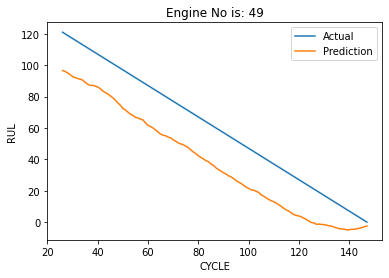



Shape of df for engine 13:  (163, 14)
RMSE on This set: 32.06502864443952


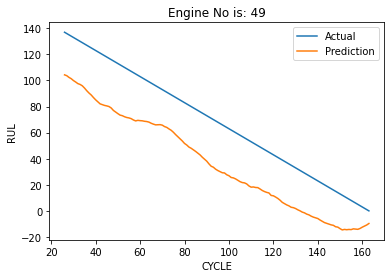



Shape of df for engine 46:  (256, 14)
RMSE on This set: 48.350027361038094


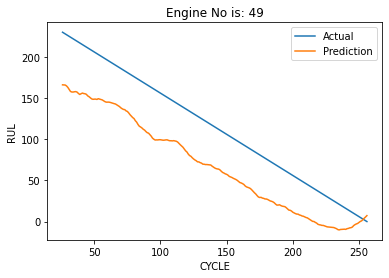



Shape of df for engine 13:  (163, 14)
RMSE on This set: 32.06502864443952


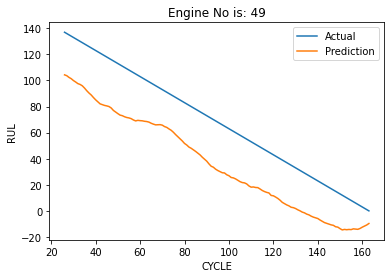



Shape of df for engine 2:  (287, 14)
RMSE on This set: 66.07806738787691


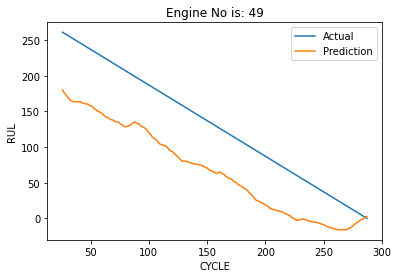

In [21]:
Train_no=1

m = np.random.randint(low=1,high=60,size=5) 

for i in m:    
    engine_id=i
    X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

    prediction=model.predict(X) ######### prediction on trained data
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
    rev_trans =pd.DataFrame(rev_trans)

    
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title('Engine No is: {}'.format(engine_no))
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')

In [13]:
rev_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,26.0,641.57,1586.48,1405.01,554.65,2387.99,47.24,522.29,2388.00,8.3997,392.0,39.16,23.4187,136.762121
1,27.0,641.64,1587.10,1403.04,554.16,2387.99,47.18,522.41,2387.97,8.3762,391.0,39.01,23.5326,136.054016
2,28.0,642.00,1588.32,1396.93,554.15,2387.99,47.00,522.60,2388.02,8.4205,392.0,39.12,23.3835,134.744739
3,29.0,641.66,1586.43,1394.31,554.12,2388.00,47.12,522.35,2387.96,8.3690,392.0,38.84,23.4971,133.172251
4,30.0,641.87,1578.31,1398.59,554.54,2387.96,47.25,522.51,2388.00,8.3854,393.0,38.94,23.3643,131.886977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,154.0,643.46,1601.63,1423.22,551.30,2388.19,48.06,519.52,2388.20,8.5111,395.0,38.58,23.0600,4.676296
129,155.0,643.07,1604.21,1430.01,551.31,2388.19,47.97,519.79,2388.23,8.5521,395.0,38.35,23.0156,3.931566
130,156.0,643.60,1603.98,1431.60,551.90,2388.17,48.35,520.09,2388.21,8.5271,395.0,38.49,23.1502,2.638227
131,157.0,644.07,1597.36,1432.96,551.11,2388.24,48.18,519.37,2388.19,8.5358,397.0,38.40,23.1416,1.951886


# Predict on Test data

Shape of df for engine 70:  (156, 14)
RMSE on This set: 1.0812123819766835


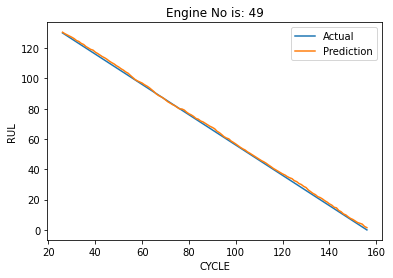



Shape of df for engine 99:  (202, 14)
RMSE on This set: 3.561131385918573


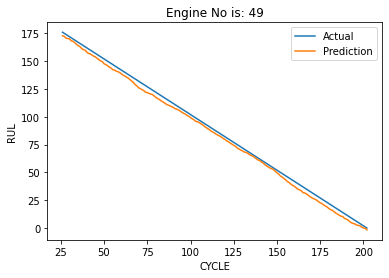



Shape of df for engine 81:  (288, 14)
RMSE on This set: 9.91061255798646


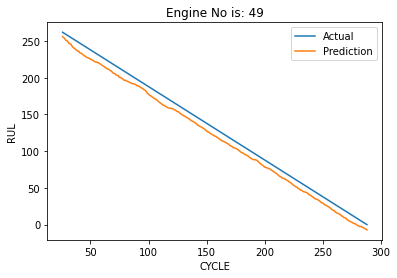



Shape of df for engine 75:  (231, 14)
RMSE on This set: 6.114097802070559


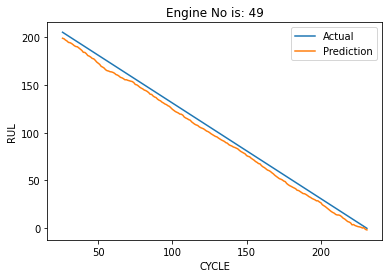



Shape of df for engine 75:  (231, 14)
RMSE on This set: 6.114097802070559


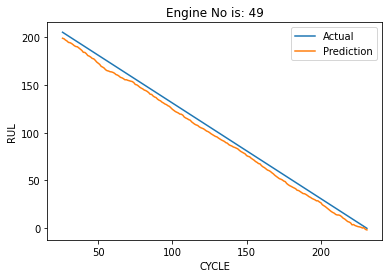



Shape of df for engine 95:  (198, 14)
RMSE on This set: 3.804214765474409


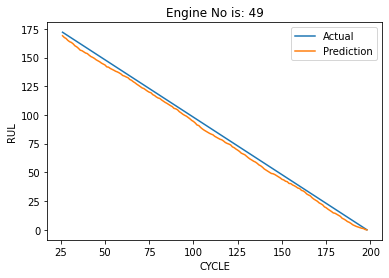



Shape of df for engine 85:  (347, 14)
RMSE on This set: 15.93268091781693


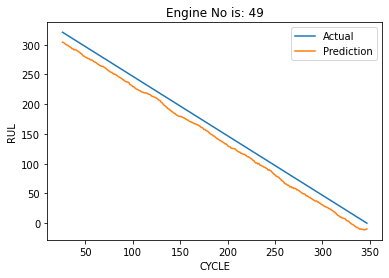



Shape of df for engine 95:  (198, 14)
RMSE on This set: 3.804214765474409


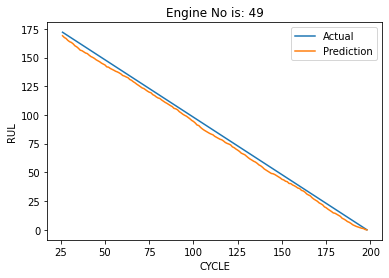



Shape of df for engine 88:  (365, 14)
RMSE on This set: 15.9540641272121


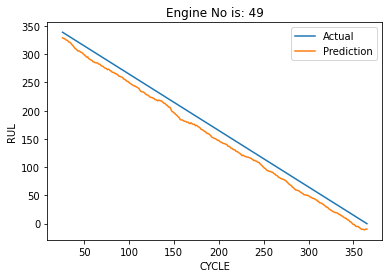



Shape of df for engine 94:  (306, 14)
RMSE on This set: 12.695942845473638


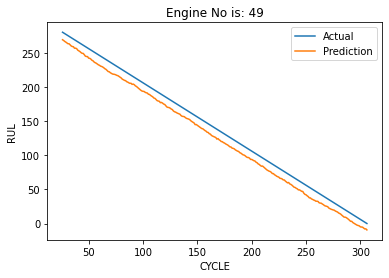



Shape of df for engine 81:  (288, 14)
RMSE on This set: 9.91061255798646


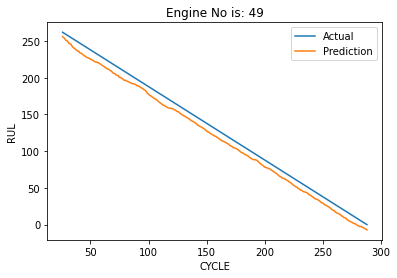



Shape of df for engine 79:  (181, 14)
RMSE on This set: 2.1940742951249006


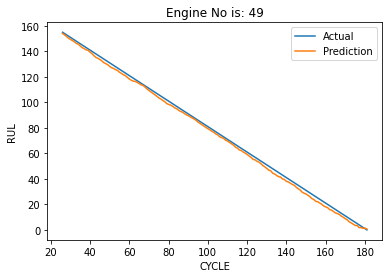



Shape of df for engine 66:  (170, 14)
RMSE on This set: 0.8563308546589151


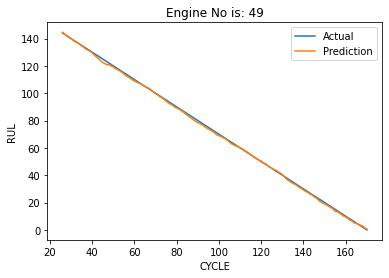



Shape of df for engine 81:  (288, 14)
RMSE on This set: 9.91061255798646


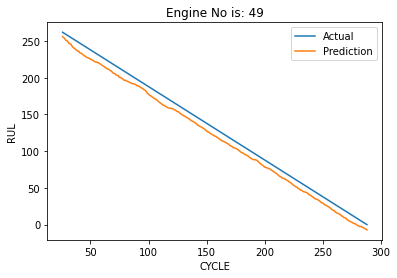



Shape of df for engine 85:  (347, 14)
RMSE on This set: 15.93268091781693


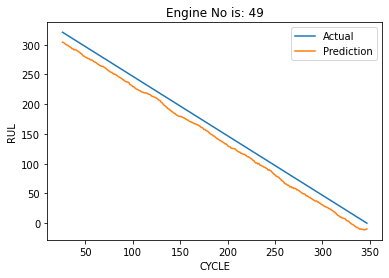



Shape of df for engine 96:  (208, 14)
RMSE on This set: 3.2537928076174234


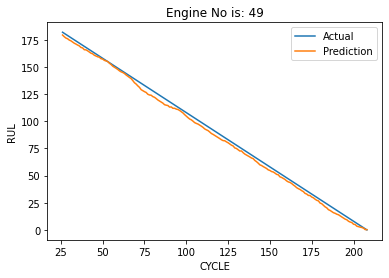



Shape of df for engine 67:  (145, 14)
RMSE on This set: 1.707639576816506


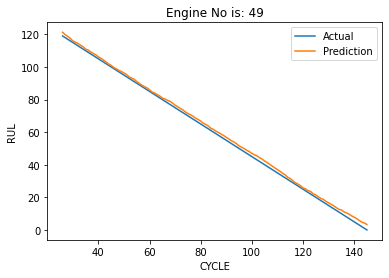



Shape of df for engine 87:  (170, 14)
RMSE on This set: 1.1240680790383544


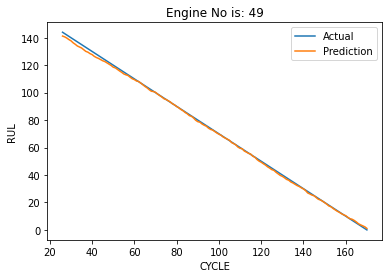



Shape of df for engine 75:  (231, 14)
RMSE on This set: 6.114097802070559


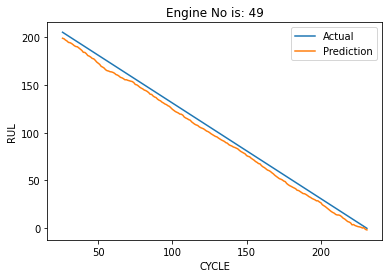



Shape of df for engine 93:  (189, 14)
RMSE on This set: 1.7391095091688202


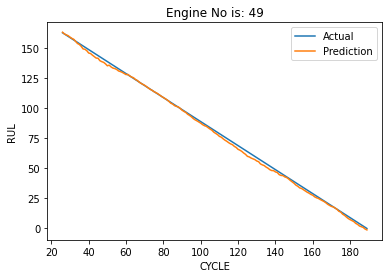



Shape of df for engine 63:  (168, 14)
RMSE on This set: 1.1274464515825287


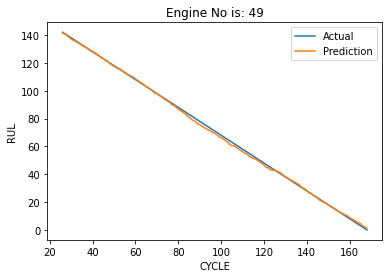



Shape of df for engine 81:  (288, 14)
RMSE on This set: 9.91061255798646


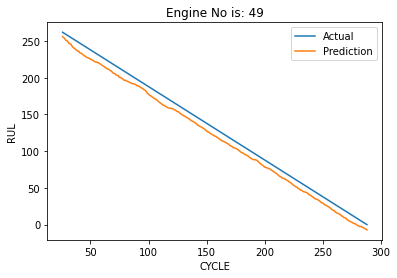



Shape of df for engine 83:  (170, 14)
RMSE on This set: 0.9083226949827592


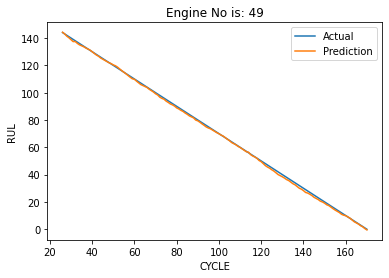



Shape of df for engine 75:  (231, 14)
RMSE on This set: 6.114097802070559


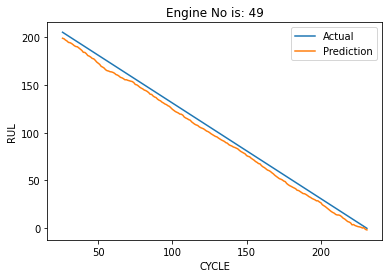



Shape of df for engine 99:  (202, 14)
RMSE on This set: 3.561131385918573


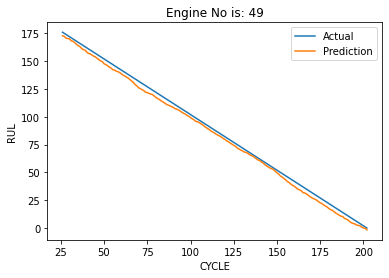

In [22]:
Train_no=2

n = np.random.randint(low=61,high=100,size=25) 

for i in n:    
    engine_id=i
    X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

    prediction=model.predict(X) ######### prediction on trained data
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
    rev_trans =pd.DataFrame(rev_trans)

    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title('Engine No is: {}'.format(engine_no))
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')

In [23]:
# save model and architecture to single file
#model.save("model_2.h5")
print("Saved model to disk")

Saved model to disk
